In [59]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

from hyperopt import hp, tpe, Trials, fmin
import numpy as np

In [60]:
data = pd.read_csv('Mobile Classification.csv')


In [61]:
data[['blue', 'dual_sim', 'four_g', 'three_g','touch_screen', 'wifi']] = data[['blue', 'dual_sim', 'four_g','three_g', 'touch_screen', 'wifi']].astype('bool')

In [62]:
x = data.iloc[:,:20]
y = data.iloc[:,-1:]

In [63]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
battery_power    2000 non-null int64
blue             2000 non-null bool
clock_speed      2000 non-null float64
dual_sim         2000 non-null bool
fc               2000 non-null int64
four_g           2000 non-null bool
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null bool
touch_screen     2000 non-null bool
wifi             2000 non-null bool
dtypes: bool(6), float64(2), int64(12)
memory usage: 230.5 KB


In [64]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
price_range    2000 non-null int64
dtypes: int64(1)
memory usage: 15.7 KB


In [65]:
num = list(x.select_dtypes(include=[np.number]))
cat = list(x.select_dtypes(include=['bool']))
num
cat

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

In [66]:
scaler = StandardScaler()
x[['battery_power', 'clock_speed',  'fc',  'int_memory',  'm_dep',  'mobile_wt', 
   'n_cores',  'pc',  'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]= scaler.fit_transform(x[['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']])


In [67]:
for i in cat:
    x[i] = LabelEncoder().fit_transform(x[i])

In [68]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
battery_power    2000 non-null float64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null float64
four_g           2000 non-null int64
int_memory       2000 non-null float64
m_dep            2000 non-null float64
mobile_wt        2000 non-null float64
n_cores          2000 non-null float64
pc               2000 non-null float64
px_height        2000 non-null float64
px_width         2000 non-null float64
ram              2000 non-null float64
sc_h             2000 non-null float64
sc_w             2000 non-null float64
talk_time        2000 non-null float64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
dtypes: float64(14), int64(6)
memory usage: 312.6 KB


In [69]:
y[y['price_range'] == 0] = 'A'
y[y['price_range'] == 1] = 'B'
y[y['price_range'] == 2] = 'C'
y[y['price_range'] == 3] = 'D'

y['price_range'].value_counts()


B    500
D    500
A    500
C    500
Name: price_range, dtype: int64

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [72]:
DT= DecisionTreeClassifier(max_depth =1)
svc = SVC(kernel = 'linear', probability = True)
gb = GaussianNB()
knn = KNeighborsClassifier()

In [75]:
bc1 = AdaBoostClassifier(random_state =8)
space1 = {'n_estimators':  [200, 400, 600, 800, 1000,1200], 
        'learning_rate': [0.1,0.2,0.3, 0.4,0.5,0.6],
         'base_estimator':[gb, DT]}
rs = RandomizedSearchCV(estimator = bc1, param_distributions = space1, n_iter=61,
                                   scoring='f1_macro',
                                   cv=3, 
                                   verbose=1, random_state=8)

rs.fit(x_train, y_train.values.ravel())

Fitting 3 folds for each of 61 candidates, totalling 183 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted'

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=8),
                   iid='warn', n_iter=61, n_jobs=None,
                   param_distributions={'base_estimator': [GaussianNB(priors=None,
                                                                      var_smoothing=1e-09),
                                                           DecisionTreeClassifier(class_weight=None,
                                                                                  criterion='gini',
                                                                                  m...
                                                                                  min_imp

In [76]:
rs.best_params_
bcc = rs.best_estimator_
rs.best_score_

0.8745071389045806

In [77]:
bcc.fit(x_train,y_train)


C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                   learning_rate=0.3, n_estimators=1200, random_state=8)

[[91  9  0  0]
 [ 0 90  9  0]
 [ 0  7 89  0]
 [ 0  0 26 79]]
0.8725
0.12749999999999995
[1.         0.8490566  0.71774194 1.        ]
[0.91       0.90909091 0.92708333 0.75238095]
[0.95287958 0.87804878 0.80909091 0.85869565]
0.8746787307261149


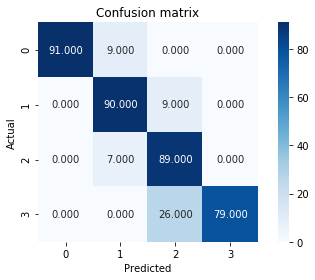

In [78]:
y_pred = bcc.predict(x_test)

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
print(metrics.f1_score(y_test, y_pred, average = 'macro')) # F1 score average

In [ ]:
y_train.head()

In [79]:
def objective_func(args):
    n_estimators = args['n_estimators']
   
    learning_rate = args['learning_rate']
    base_estimator = args['base_estimator']

 
    clf = AdaBoostClassifier(n_estimators = n_estimators, learning_rate = learning_rate, base_estimator = base_estimator)
    
    
    clf.fit(x_train,y_train)    
    y_pred = clf.predict(x_test)
    f1 = -(f1_score(y_pred,y_test,  average='macro'))
    return f1
space = {'n_estimators':  hp.choice('n_estimators',[200, 400, 600, 800, 1000]), 
        'learning_rate': hp.choice('learning_rate',[0.1, 0.2, 0.3, 0.4, 0.5]),
        'base_estimator':hp.choice('base_estimator',[gb, DT])}
                                
                                
                                
best_classifier = fmin(objective_func, space, algo=tpe.suggest, max_evals=61)
print(best_classifier)

  0%|          | 0/61 [00:00<?, ?it/s, best loss: ?]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



  2%|▏         | 1/61 [00:05<05:16,  5.27s/it, best loss: -0.8935149318763321]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



  3%|▎         | 2/61 [00:11<05:26,  5.53s/it, best loss: -0.8935149318763321]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



  5%|▍         | 3/61 [00:14<04:38,  4.80s/it, best loss: -0.8935149318763321]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



  7%|▋         | 4/61 [00:20<04:48,  5.07s/it, best loss: -0.8935149318763321]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



  8%|▊         | 5/61 [00:23<04:10,  4.47s/it, best loss: -0.8935149318763321]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 10%|▉         | 6/61 [00:29<04:34,  4.99s/it, best loss: -0.8935149318763321]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 11%|█▏        | 7/61 [00:34<04:23,  4.87s/it, best loss: -0.8935149318763321]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 13%|█▎        | 8/61 [00:37<03:58,  4.51s/it, best loss: -0.8935149318763321]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 15%|█▍        | 9/61 [00:43<04:16,  4.93s/it, best loss: -0.8935149318763321]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 16%|█▋        | 10/61 [00:53<05:21,  6.29s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 18%|█▊        | 11/61 [00:55<04:09,  4.98s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 20%|█▉        | 12/61 [01:02<04:44,  5.80s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 21%|██▏       | 13/61 [01:10<05:02,  6.29s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 23%|██▎       | 14/61 [01:20<05:47,  7.39s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 25%|██▍       | 15/61 [01:23<04:48,  6.26s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 26%|██▌       | 16/61 [01:31<05:02,  6.72s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 28%|██▊       | 17/61 [01:41<05:35,  7.62s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 30%|██▉       | 18/61 [01:43<04:15,  5.93s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 31%|███       | 19/61 [01:49<04:08,  5.91s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 33%|███▎      | 20/61 [01:57<04:27,  6.51s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 34%|███▍      | 21/61 [02:06<05:01,  7.54s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 36%|███▌      | 22/61 [02:16<05:21,  8.23s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 38%|███▊      | 23/61 [02:26<05:31,  8.72s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 39%|███▉      | 24/61 [02:36<05:33,  9.02s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 41%|████      | 25/61 [02:45<05:24,  9.02s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 43%|████▎     | 26/61 [02:49<04:25,  7.57s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 44%|████▍     | 27/61 [02:55<03:57,  6.98s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 46%|████▌     | 28/61 [03:00<03:33,  6.46s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 48%|████▊     | 29/61 [03:01<02:38,  4.96s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 49%|████▉     | 30/61 [03:07<02:36,  5.04s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 51%|█████     | 31/61 [03:13<02:41,  5.39s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 52%|█████▏    | 32/61 [03:20<02:49,  5.83s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 54%|█████▍    | 33/61 [03:27<02:54,  6.23s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 56%|█████▌    | 34/61 [03:28<02:08,  4.75s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 57%|█████▋    | 35/61 [03:32<01:54,  4.40s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 59%|█████▉    | 36/61 [03:38<02:00,  4.83s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 61%|██████    | 37/61 [03:45<02:16,  5.71s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 62%|██████▏   | 38/61 [03:48<01:49,  4.75s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 64%|██████▍   | 39/61 [03:51<01:31,  4.16s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 66%|██████▌   | 40/61 [03:53<01:14,  3.54s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 67%|██████▋   | 41/61 [03:59<01:27,  4.39s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 69%|██████▉   | 42/61 [04:09<01:51,  5.89s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 70%|███████   | 43/61 [04:11<01:25,  4.74s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 72%|███████▏  | 44/61 [04:14<01:16,  4.49s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 74%|███████▍  | 45/61 [04:22<01:28,  5.53s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 75%|███████▌  | 46/61 [04:27<01:19,  5.30s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 77%|███████▋  | 47/61 [04:37<01:32,  6.58s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 79%|███████▊  | 48/61 [04:39<01:07,  5.20s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 80%|████████  | 49/61 [04:49<01:19,  6.63s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 82%|████████▏ | 50/61 [04:53<01:04,  5.87s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 84%|████████▎ | 51/61 [04:54<00:45,  4.56s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 85%|████████▌ | 52/61 [04:58<00:39,  4.34s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 87%|████████▋ | 53/61 [05:02<00:33,  4.25s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 89%|████████▊ | 54/61 [05:08<00:32,  4.65s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 90%|█████████ | 55/61 [05:13<00:28,  4.73s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 92%|█████████▏| 56/61 [05:19<00:25,  5.10s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 93%|█████████▎| 57/61 [05:24<00:21,  5.28s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 95%|█████████▌| 58/61 [05:30<00:16,  5.45s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 97%|█████████▋| 59/61 [05:36<00:11,  5.60s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 98%|█████████▊| 60/61 [05:40<00:05,  5.21s/it, best loss: -0.8984676604809165]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



100%|██████████| 61/61 [05:48<00:00,  6.05s/it, best loss: -0.8984676604809165]
{'base_estimator': 0, 'learning_rate': 1, 'n_estimators': 4}


In [80]:

bccbo = AdaBoostClassifier(learning_rate= 0.2, base_estimator = gb,n_estimators = 1000)
bccbo.fit(x_train, y_train)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                   learning_rate=0.2, n_estimators=1000, random_state=None)

[[92  8  0  0]
 [ 0 95  4  0]
 [ 0  6 90  0]
 [ 0  0 23 82]]
0.8975
0.10250000000000004
[1.         0.87155963 0.76923077 1.        ]
[0.92       0.95959596 0.9375     0.78095238]
[0.95833333 0.91346154 0.84507042 0.87700535]
0.8984676604809165


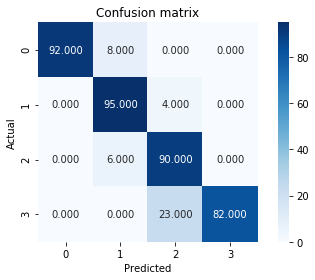

In [81]:
y_pred = bccbo.predict(x_test)

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
print(metrics.f1_score(y_test, y_pred, average = 'macro')) # F1 score average